## Cleaning and Visualizing Titanic Data
In this Notebook, we will be exploring the [titanic dataset](https://www.kaggle.com/c/titanic/data). In the process of exploring this data, we will be covering techniques on exploratory data analysis.

Our Notebooks in CSMODEL are designed to be guided learning activities. To use them, simply through the cells from top to bottom, following the directions along the way. If you find any unclear parts or mistakes in the Notebooks, email me at arren.antioquia@dlsu.edu.ph

## Import
Import **pandas** and **matplotlib**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The Dataset
For this notebook, we will working on a dataset called `titanic dataset`. This dataset contains passenger information from a subset of passengers of Titanic.

The dataset is provided to you as a `.csv` file. `.csv` means comma-separated values. You can open the file in Notepad to see how it is exactly formatted.

If you view the `.csv` file in Excel, you can see that our dataset contains many **observations** (rows) across 12 **variables** (columns). The following are the descriptions of each variable in the dataset.

- **`Passenger`**: Passenger number.
- **`Survived`**: Indicates if the passenger has survived (1) or not (0).
- **`Pclass`**: Ticket class. 1 = Upper; 2 = Middle; 3 = Lower.
- **`Name`**: Name of the passenger.
- **`Sex`**: Sex.
- **`Age`**: Age.
- **`SibSp`**: Number of siblings / spouses aboard the Titanic.
- **`Parch`**: Number of parents / children aboard the Titanic.
- **`Ticket`**: Ticket Number.
- **`Fare`**: Passenger fare.
- **`Cabin`**: Cabin number.
- **`Embarked`**: Point of embarkation. C = Cherbourg; Q = Queenstown; S = Southampton.

## Reading the Dataset
Our first step is to load the dataset using `pandas`. This will load the dataset into a pandas `DataFrame`. To load the dataset, we use the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function. Note that you may need to change the path depending on the location of the file in your machine.

In [2]:
titanic_df = pd.read_csv("titanic.csv")

Whenever we load a new dataset, it is generally a good idea to call the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function, which displays general information about the dataset.

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Cleaning the Dataset
The next step in Exploratory Data Analysis is cleaning the data.

Let's first check if the values in relevant variables in the dataset are within the range of acceptable values. 

### `Survived` variable
Check if the values for the `Survived` varible is either 1 or 0. Use the [`unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to list all unique values for this variable.

In [4]:
titanic_df['Survived'].unique()

array([0, 1])

### `Pclass` variable
Valid values for the `Pclass` variable are 1, 2, or 3. List all unique values for the `Pclass` variable.

In [6]:
# Write your code here
titanic_df['Pclass'].unique()

array([3, 1, 2])

**Question #1:** Do we need to perform data cleaning for the `Pclass` variable? Explain.
- No because there are no invalid values

### `Sex` variable
List all unique values for the `Sex` variable.

In [7]:
titanic_df['Sex'].unique()

array(['male', 'female', 'm', 'M', 'F', 'f', 'Female', 'Male'],
      dtype=object)

Since we discover that there are multiple representations of the same sex (`Male`, `M`, `m`, `male` for male; `Female`, `F`, `f`, `female` for female), let's modify these values to combine different representations. It would be best to check the most prevalent representation for each sex. To find out the number of observations per value, we use the [`value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) function. This function returns the count of each unique value in the Series.

In [8]:
titanic_df['Sex'].value_counts()

male      551
female    300
m          12
M          10
F           7
f           4
Male        4
Female      3
Name: Sex, dtype: int64

We discover that most observations in the dataset use the `male` and `female` representations. We'll use the [`map`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function to change the values of the other representations. 

In [11]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 'male', 'm': 'male', 'M': 'male', 'Male': 'male', 
                                           'female': 'female', 'f': 'female', 'F': 'female', 'Female': 'female'})

Upon mapping all equivalent values to `male` and `female`, let's check the unique values for the `Sex` variable.

In [10]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

After mapping different representations of the same value to one representation, let's check the number of observations per value.

In [12]:
# Write your code here
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**Question #2:** After cleaning, how many observations have the value `male` for the `Sex` variable?
- 577

**Question #3:** After cleaning, how many observations have the value `female` for the `Sex` variable?
- 314

**Question #4:** After cleaning, how many observations have the value `f` for the `Sex` variable?
- 0

### `Embarked` variable
List all unique values for the `Embarked` variable.

In [13]:
# Write your code here
titanic_df['Embarked'].unique()

array(['S', 'c', 'q', 'C', 'Q', nan, 's'], dtype=object)

Determine if the variable contains multiple representation pertaining to the same value. If needed, map the other values to their corresponding prevalent representation.

In [15]:
# Map values 's', 'c' and 'q' to 'S', 'C', and 'Q' respectively
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 'S', 's': 'S', 'C':'C', 'c': 'C', 'Q': 'Q', 'q': 'Q'})

After performing some operations (if needed), let's check the unique values for the `Embarked` variable again.

In [16]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

After mapping different representations of the same value to one representation, let's check the number of observations per value.

In [18]:
# Write your code here
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Question #5:** After cleaning, how many observations have the value `S` for the `Embarked` variable?
- 644

**Question #6:** After cleaning, how many observations have the value `C` for the `Embarked` variable?
- 168

**Question #7:** After cleaning, how many observations have the value `Q` for the `Embarked` variable?
- 77

### Checking for `NaN`s
We will now handle missing data in our dataset. Let us check each variable if it contains a `NaN` / `null` value. We'll use the [`isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) and [`any`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) functions for this. This function call will list each variable with a boolean value indicating if the variable contains a `NaN` / `null` value.

In [19]:
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Let's get the list of columns with `NaN` / `null` values.

In [20]:
nan_variables = titanic_df.columns[titanic_df.isnull().any()].tolist()
print(nan_variables)

['Age', 'Cabin', 'Embarked']


For each variable, show the total number of observation with `NaN` / `null` value.

In [21]:
for variable in nan_variables:
    print(variable, sum(titanic_df[variable].isnull()))

Age 177
Cabin 687
Embarked 2


**Question #8:** Before cleaning, how many observations have the `NaN` value for the `Age` variable?
- 177

**Question #9:** Before cleaning, how many observations have the `NaN` value for the `Cabin` variable?
- 687

**Question #10:** Before cleaning, how many observations have the `NaN` value for the `Embarked` variable?
- 2

Since we see that there is a very small number of observation with `NaN` / `null` value for the `Embarked` variable, we can decide to drop those observations from the dataset. 

**Hint!** Use the [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function.

In [23]:
# Write your code here
titanic_df = titanic_df.dropna(subset=['Embarked'])

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Question #11:** After dropping, how many observations are left in our `DataFrame`?
- 889

Check if the observations with `NaN` / `null` values for the `Embarked` variable have been dropped from the dataset. Make sure that the `NaN` value is not included in the list of all values for the `Embarked` variable.

In [24]:
# Write your code here
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

**Sanity Check!** Your code should display:

```array(['S', 'C', 'Q'], dtype=object)```

There is a significant number of observation with `NaN` / `null` value for the `Age` variable. Instead of removing these observations from the dataset, we can just set a sentinel value to identify these observations. Since age cannot be a negative number, let's represent observations with no value for the `Age` variable as -1. Use the [`loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) function to select and assign -1 as value for the `Age` variable of these observations

In [25]:
titanic_df.loc[titanic_df['Age'].isnull(),'Age'] = -1

Write a line of code to display the boolean `False` indicating that there is no null value for the `Age` variable.

In [26]:
# Write your code here
titanic_df['Age'].isnull().any()

False

Let's count number of observations with the sentinel value.

In [27]:
# Write your code here
titanic_df['Age'].value_counts()

-1.00     177
 24.00     30
 22.00     27
 18.00     26
 28.00     25
         ... 
 36.50      1
 55.50      1
 66.00      1
 23.50      1
 0.42       1
Name: Age, Length: 89, dtype: int64

**Question #12:** After cleaning, how many observations have a value equal to the sentinel value -1 for the `Age` variable?
- 177

There is a significant number of observation with `NaN` / `null` value for the `Cabin` variable. Instead of removing these observations from the dataset, we can just set a default value to identify these observations. Set the value of those observations with `NaN` / `null` as value for the `Cabin` variable to the value 0.

In [28]:
# Write your code here
titanic_df.loc[titanic_df['Cabin'].isnull(),'Cabin'] = 0

Write a line of code to display the boolean `False` indicating that there is no null value for the `Cabin` variable.

In [29]:
# Write your code here
titanic_df['Cabin'].isnull().any()

False

Let's count number of observations with the sentinel value.

In [30]:
# Write your code here
titanic_df['Cabin'].value_counts()

0              687
B96 B98          4
C23 C25 C27      4
G6               4
F33              3
              ... 
C103             1
A36              1
C118             1
B42              1
B80              1
Name: Cabin, Length: 147, dtype: int64

**Question #13:** After cleaning, how many observations have a value equal to the sentinel value 0 for the `Cabin` variable?
- 687

## Visualizations
You will need to visualize the next parts. Here are some sample codes to help you display 3 simple charts: bar plot, histograms, and scatter plots.

### Bar plot
Bar plots are used to show the count of each value. They are only used for categorical data. Use the [`bar`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) function.

Let's create a plot showing the survival status of Titanic passengers.

Text(0.5, 1.0, 'Bar plot of survival status of Titanic passengers')

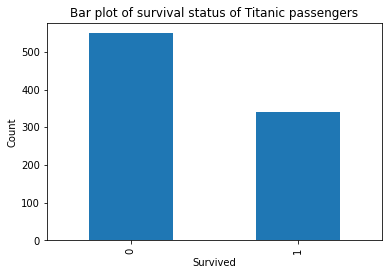

In [31]:
survived_count_df = titanic_df['Survived'].value_counts()

survived_count_df.plot.bar()
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar plot of survival status of Titanic passengers')

Let's create a plot showing the survival status of Titanic passengers with respect to the sex.

Text(0.5, 1.0, 'Bar plot of survival status of Titanic passengers')

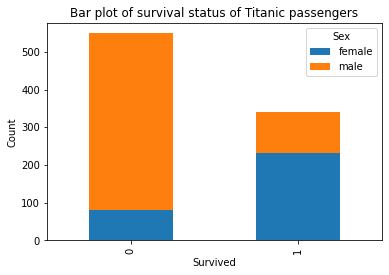

In [32]:
titanic_df.groupby(['Survived', 'Sex']).size().unstack().plot(kind='bar', stacked='True')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar plot of survival status of Titanic passengers')

### Histogram
If the data is continuous, histograms are used. 

With bar plots, it might be impossible to write down all the numbers that appeared. Furthermore, the x-axis will not represent the scale correctly. Use the [`hist`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) function

Let's create a histogram of the age of Titanic passengers.

Text(0.5, 1.0, 'Histogram of the age of Titanic passengers')

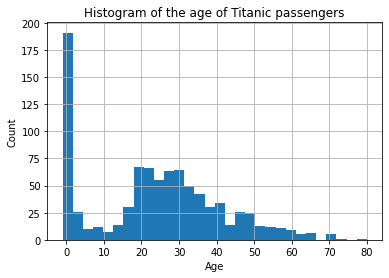

In [33]:
titanic_df['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of the age of Titanic passengers')

Based on the plot, we see that our histogram shows that most observations are `NaN` (represented as -1). Let us temporarily remove these observations and create the histogram again.

Text(0.5, 1.0, 'Histogram of the age of Titanic passengers')

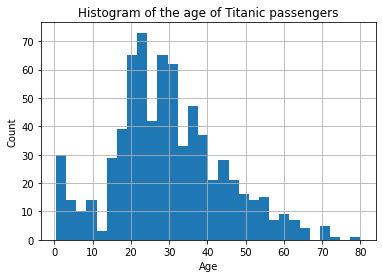

In [34]:
titanic_copy_df = titanic_df[titanic_df['Age'] != -1]
titanic_copy_df['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of the age of Titanic passengers')

### Scatter plot

We can use scatter plot to compare two quantitative attributes. Use the [`plot`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.plot.html) function of `matplotlib`.

Let's create a scatterlot of the fare and age of Titanic passengers.

Text(0.5, 1.0, 'Scatterplot of the fare and age of Titanic passengers')

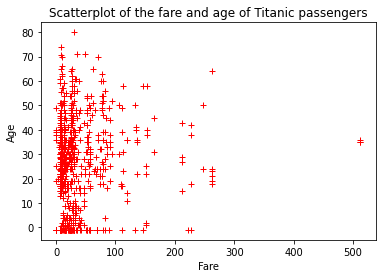

In [35]:
plt.plot(titanic_df['Fare'], titanic_df['Age'], 'r+')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Scatterplot of the fare and age of Titanic passengers')

## Exploratory Data Analysis

Visualize the relationship between the `Survived` variable and the `Age` variable. Use the appropriate plot to show the relationship.

### Barplot
A more detailed plot for actual age. The labels need fixing, but I don't think it's necessary to actually look at the per age plot and so I'm also putting a histogram in this question

Text(0.5, 1.0, 'Bar plot of survival status of Titanic passengers')

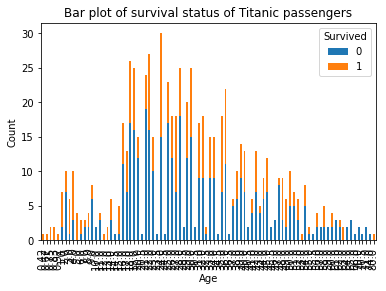

In [39]:
titanic_copy_df.groupby(['Age', 'Survived']).size().unstack().plot(kind='bar', stacked='True')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bar plot of survival status of Titanic passengers')

### Histogram
A plot for age ranges

<AxesSubplot:ylabel='Frequency'>

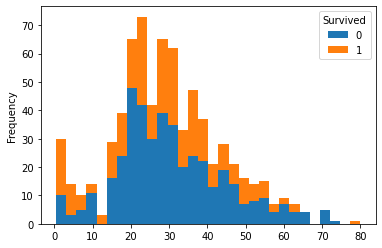

In [38]:
# Write your code here
titanic_copy_df.pivot(columns='Survived').Age.plot(kind = 'hist', stacked=True, bins=30)


**Question #14:** Describe the data based on the plot. Why did you use this plot to visualize the relationship between the `Survived` variable and the `Age` variable?
- There are more 20's - 30's aged passengers in the titanic compared to other age ranges

- There seems to be unforunately more of those who did **NOT** survive compared to those who did. On the bright side, looking at the bar plot (per age), all infants `(age == 0)` survived

- I put both bar and histogram for this. The bar plot is for a more specific plot per age (age is an _int_ and therefor not continuous), but for looking at the bigger picture, I also wanted to put a histogram to compress the graph per age-range so that it's easier to read. Both plots are stacked based on `Survived` column for comparison

Visualize the relationship between the `Survived` variable and the `Pclass` variable. Use the appropriate plot to show the relationship.

Text(0.5, 1.0, 'Bar plot of survival status of Titanic passengers')

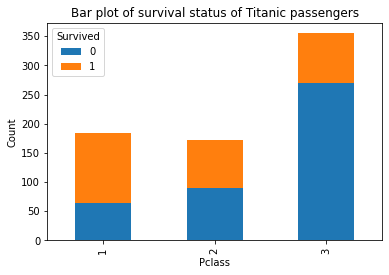

In [40]:
# Write your code here
titanic_copy_df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked='True')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Bar plot of survival status of Titanic passengers')

**Question #15:** Describe the data based on the plot. Why did you use this plot to visualize the relationship between the `Survived` variable and the `Pclass` variable?
- There's a high frequency of *lower* ticket class holders `(Pclass == 3)` who did not survive which location-wise made sense because they are located at the bottom of the ship which would make it harder for them to go up to deck

- I used just the stacked bar plot for this because there are only 3 possible values for `Pclass` (no need for histogram). The _stack_ for `Survived` is for comparison.